In [1]:
%matplotlib inline

In [174]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, spectral_clustering, MiniBatchKMeans
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA

In [162]:
rgb = imread('rgbd/000000.png')
h,w,c = rgb.shape
dep = np.load('rgbd/000000.npy')[:,:,0]
dep = resize(dep, (h, w))
mask = dep.astype(bool)
img_test = np.zeros((h,w,4))
img_test[:,:,0:3] = rgb
img_test[:,:,3] = dep

E:\program\Anaconda3\envs\tensorflow_gpu\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "



# K-means Clustering


The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




In [129]:
pts = []
for i in range(h):
    for j in range(w):
        # i,j,rgb[i,j,0],rgb[i,j,1],rgb[i,j,2],dep[i,j]
        pts.append([i-h/2,j-w/2,rgb[i,j,0],rgb[i,j,1],rgb[i,j,2], dep[i,j]*500])
pts = np.asarray(pts)

In [130]:
estimator = KMeans(n_clusters=5)
estimator.fit(pts)
labels = estimator.labels_

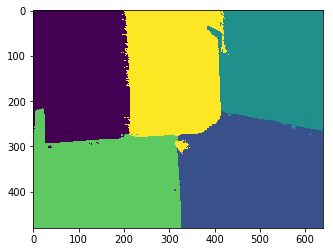

In [131]:
img = np.zeros((h,w))
for i in range(h):
    for j in range(w):
        img[i,j] = labels[w*i+j]
plt.imshow(img)

# DBSCAN clustering 

In [132]:
pts = []
for i in range(h):
    for j in range(w):
        # i,j,rgb[i,j,0],rgb[i,j,1],rgb[i,j,2],dep[i,j]
        pts.append([i-h/2,j-w/2,dep[i,j]*500])
pts = np.asarray(pts)

Estimated number of clusters: 933


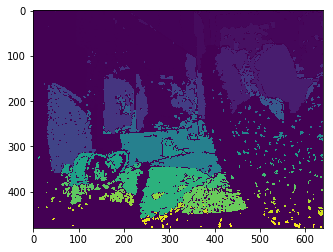

In [151]:
db = DBSCAN(eps=1, min_samples=5).fit(pts)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

img = np.zeros((h,w))
for i in range(h):
    for j in range(w):
        img[i,j] = labels[w*i+j]
plt.imshow(img)

# Spectral clustering



In [152]:
graph = image.img_to_graph(dep, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img_test)
plt.matshow(label_im)

plt.show()

E:\program\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

# PCA

In [164]:
pts = []
for i in range(h):
    for j in range(w):
        # i,j,rgb[i,j,0],rgb[i,j,1],rgb[i,j,2],dep[i,j]
        pts.append([i-h/2,j-w/2,dep[i,j]*500])
pts = np.asarray(pts)

In [168]:
pca = decomposition.PCA(n_components=3)
pca.fit(pts)
labels = pca.transform(pts)

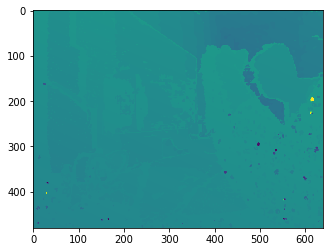

In [172]:
img = np.zeros((h,w))
for i in range(h):
    for j in range(w):
        img[i,j] = labels[w*i+j,2]
plt.imshow(img)

In [175]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [176]:
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [177]:
pca.components_

array([[-0.83849224, -0.54491354],
       [ 0.54491354, -0.83849224]])